## Loading the Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['world-happiness-report-2019.csv']


## Loading the dataset..

In [2]:
df= pd.read_csv('../input/world-happiness-report-2019.csv')

### Let's have an overview:

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


## Complete description of Data:

In [4]:
df.describe(include='all')

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
unique,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Northern Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,NaN,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,NaN,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,NaN,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000


## Checking the missing values:

In [5]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

### We clearly observe the following missing values:
    Positive affect             1
    Negative affect             1
    Social support              1
    Freedom                     1
    Corruption                  8
    Generosity                  1
    Log of GDP\nper capita      4
    Healthy life\nexpectancy    6

## Correlation Matrix:

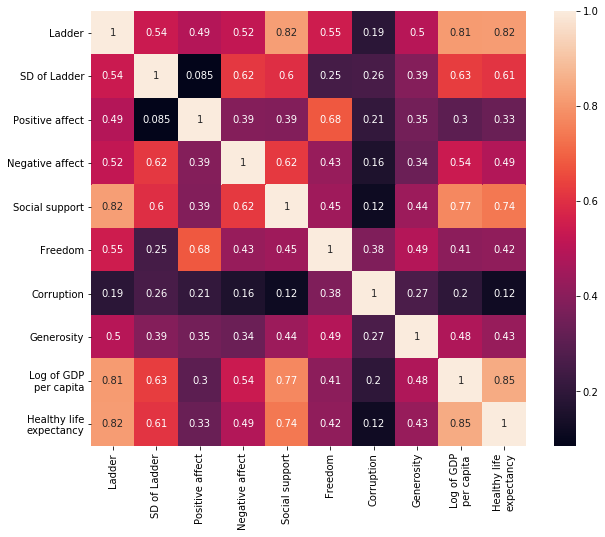

In [6]:
plt.figure(figsize=(10,8))
# Correlation Map
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True)

## Imputing the missing values:

In [7]:
df['Positive affect'].fillna(df['Positive affect'].mean(),inplace=True)
df['Negative affect'].fillna(df['Negative affect'].mean(),inplace=True)
df['Social support'].fillna(df['Social support'].mode(),inplace=True)
df['Freedom'].fillna(df['Freedom'].median(),inplace=True)
df['Corruption'].fillna(df['Corruption'].mean(),inplace=True)
df['Generosity'].fillna(df['Generosity'].median(),inplace=True)
df['Log of GDP\nper capita'].fillna(df['Log of GDP\nper capita'].mean(),inplace=True)
df['Healthy life\nexpectancy'].fillna(df['Healthy life\nexpectancy'].mean(),inplace=True)

## Analyzing based on Continent:

### Splitting into continents:

In [8]:
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]
d_asia = dict.fromkeys(asia, 'Asia')
d_europe = dict.fromkeys(europe, 'Europe')
d_north_america = dict.fromkeys(north_america, 'North America')
d_south_america = dict.fromkeys(south_america, 'South America')
d_australia = dict.fromkeys(australia, 'Australia')
continent_dict = {**d_asia, **d_europe, **d_north_america, **d_south_america, **d_australia}
df["continent"] = df["Country (region)"].map(continent_dict)
df.continent.fillna("Africa", inplace=True)

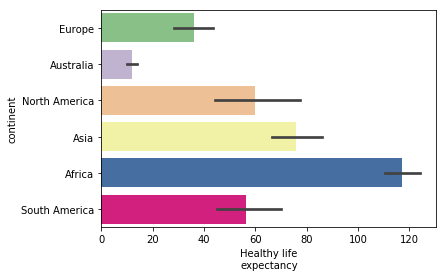

In [9]:
sns.barplot(x="Healthy life\nexpectancy", y="continent", data=df, palette='Accent')

We see that **Africa** has the highest *Healthy Life Expectancy*

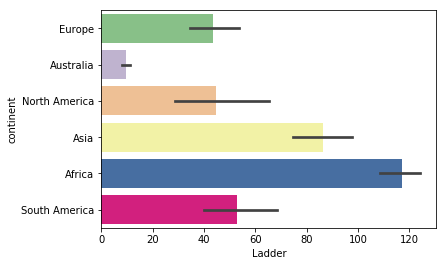

In [10]:
sns.barplot(x="Ladder", y="continent", data=df, palette='Accent')

Similarly **Africa** has the highest *Ladder*

## Healty Life Expectancy based on Country/ Reigion:

### Countries with Max Expectancy:

In [11]:
print(df[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending=False).head(10))

                          Healthy life\nexpectancy
Country (region)                                  
Central African Republic                     150.0
Lesotho                                      149.0
Chad                                         148.0
Ivory Coast                                  147.0
Sierra Leone                                 146.0
Nigeria                                      145.0
Somalia                                      144.0
South Sudan                                  143.0
Mali                                         142.0
Cameroon                                     141.0


We see that **Central African Republic** has highest life expectancy followed by **Lesotho** and others.

### Vizualizing above results:

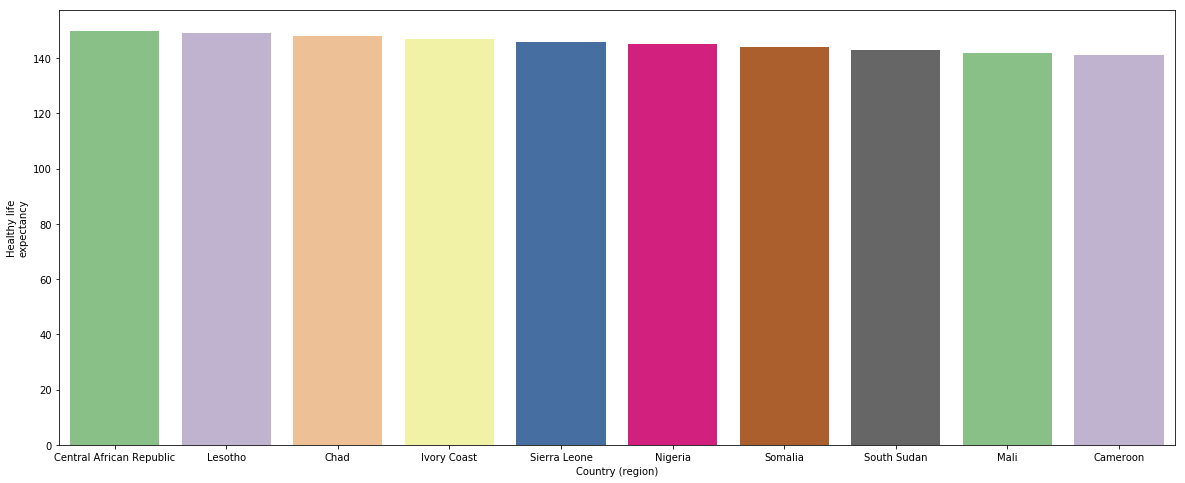

In [12]:
most_happy = df.sort_values('Healthy life\nexpectancy', ascending = False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(most_happy['Country (region)'], most_happy['Healthy life\nexpectancy'], palette='Accent')

#### As we saw earlier we have similar trend shown by our graph.

### Countries with Minimum Expectancy:

In [13]:
print(df[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending=False).tail(10))

                  Healthy life\nexpectancy
Country (region)                          
Australia                             10.0
South Korea                            9.0
Canada                                 8.0
Italy                                  7.0
Cyprus                                 6.0
France                                 5.0
Switzerland                            4.0
Spain                                  3.0
Japan                                  2.0
Singapore                              1.0


We see that **Singapore** is the country with minimum healthy life expectancy. The above list is the list of countries with **least** *healthy life expectancy*

### Vizualizing this result:

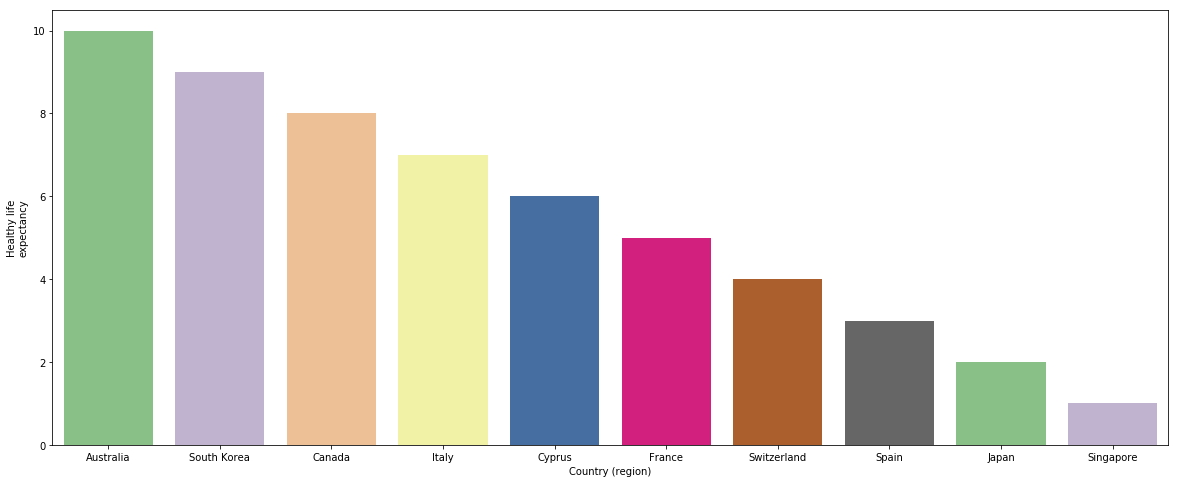

In [14]:
most_happy = df.sort_values('Healthy life\nexpectancy', ascending = False).tail(10)
plt.figure(figsize=(20,8))
sns.barplot(most_happy['Country (region)'], most_happy['Healthy life\nexpectancy'], palette='Accent')

### Let's have an overall look:

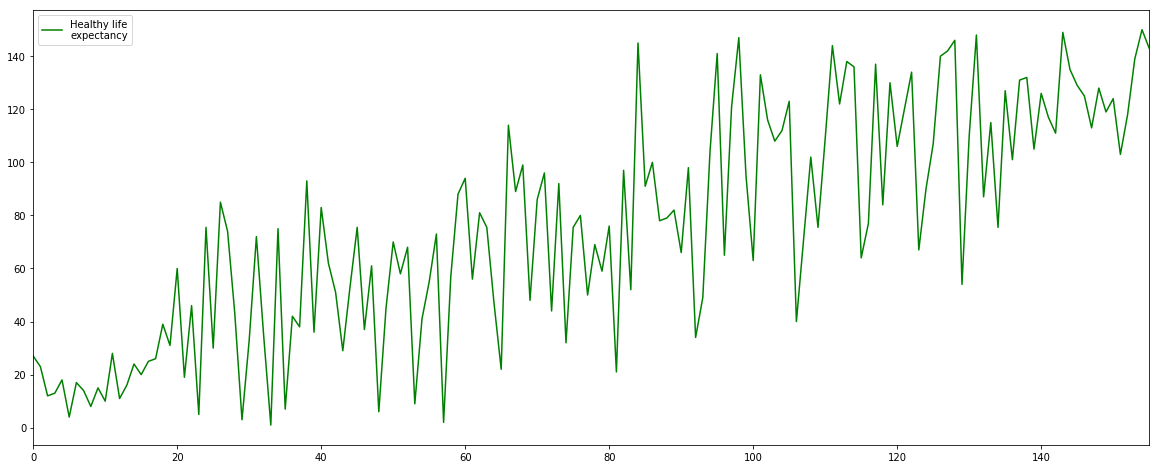

In [15]:
country_wise = df[['Country (region)', 'Healthy life\nexpectancy']]
country_wise.plot(kind = 'line',figsize=(20,8),color='g')
plt.show()

The above **Line Plot** shows the trend of the coutries across the world.

## Ladder:

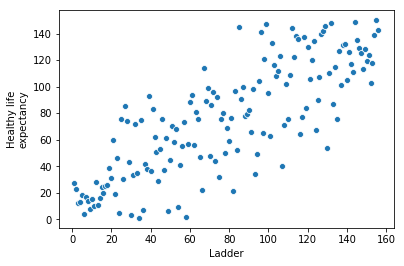

In [16]:
sns.scatterplot(x='Ladder',y='Healthy life\nexpectancy',data=df)

#### The above sactter plot shows the relation of Ladder with *Helthy/Life Expectancy*

#### The positive correlation can be clearly observed in this scattter plot.

## Analyzing GDP:

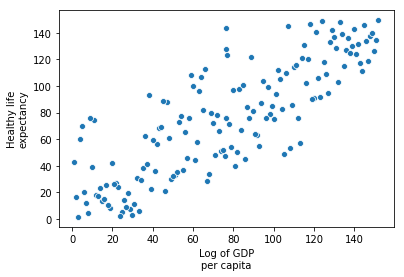

In [17]:
sns.scatterplot(x='Log of GDP\nper capita',y='Healthy life\nexpectancy',data=df)

#### High positive correlation can be observed.

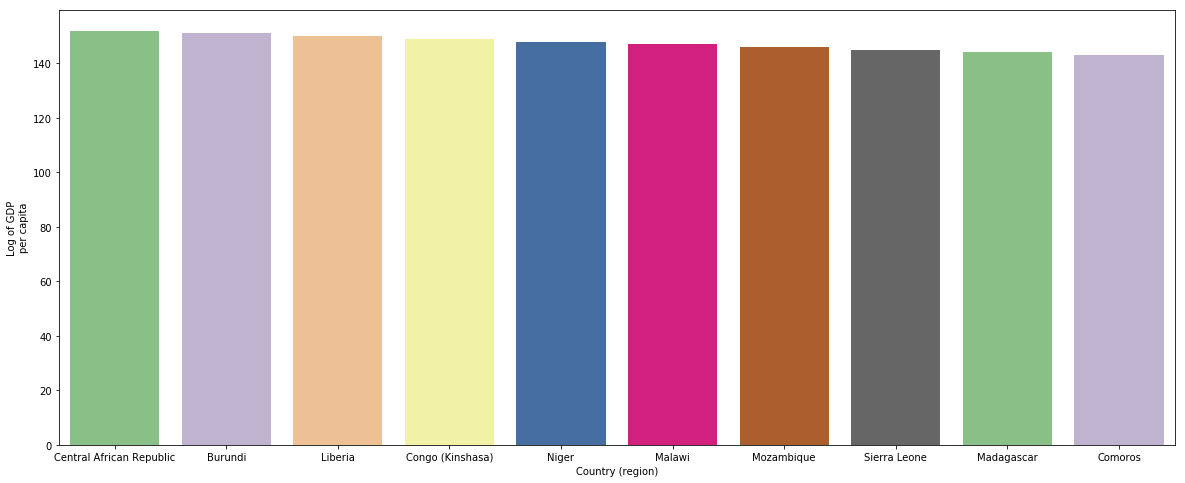

In [18]:
most_gdp = df.sort_values('Log of GDP\nper capita', ascending = False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(most_gdp['Country (region)'], most_gdp['Log of GDP\nper capita'], palette='Accent')

#### We can clealy observe that Central African Republic has the highest GDP and the Highest Life Expectancy as well and hence showing some clear trends.

## Analyzing Social Support:

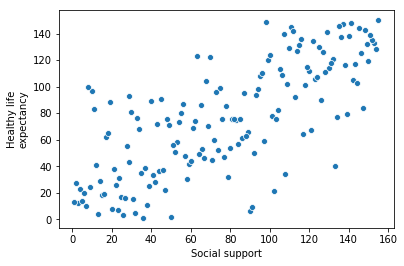

In [19]:
sns.scatterplot(x='Social support',y='Healthy life\nexpectancy',data=df)

Again we see high positive correlation.

## Results:
We see that factors which tend to support humanity and try to boost development of Society as a whole tend to increase the **Healthy Life Expectancy**. These factors include: **GDP, Social Support, Ladder** and many more.

## Regression (Predicting a country's Expectancy):

Name of **country** and **continent** does not play any role, therefore we'll drop it.

In [20]:
df=df.drop('Country (region)',axis=1)
df=df.drop('continent',axis=1)

### Importing the sklearn lib.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Converting to numpy arrays

In [22]:
X=df.iloc[:,:-1].values
y=df.iloc[:,:11].values

#### Splitting the data into test and train:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Fitting and Predicting:

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

### Vizualizing the test and Predicted Results

Text(0, 0.5, 'Predicted y')

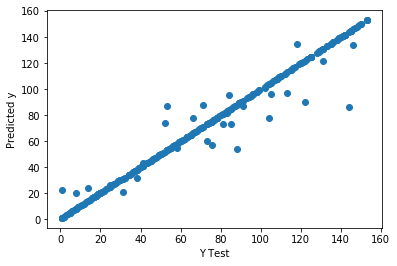

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

### Evaluating the Results:

In [26]:
# Evaluate the data
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 1.3612989669497302
MSE 33.98002936016782
RMSE 5.8292391750697465


## We have a very good accuracy (97.7 %)

In [27]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9778145633725079

## Please Upvote/star if you like.